# How to create rotated nested grids

In [1]:
from nes import *
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
%matplotlib inline

## 1. Create dataset

### Define grid details

#### Parent grid

In [3]:
path = '/gpfs/projects/bsc32/models/NES_tutorial_data/O3_all-000_2021080300.nc'
parent_nessy = open_netcdf(path)

#### Rotated nested grid

In [4]:
projection='rotated-nested'
parent_ratio = 0.5
i_parent_start = 20
j_parent_start = 20
n_rlat = 40
n_rlon = 50
nessy = create_nes(comm=None, info=False, projection=projection,
                   parent_grid_path=path, parent_ratio=parent_ratio,
                   i_parent_start=i_parent_start, j_parent_start=j_parent_start,
                   n_rlat=n_rlat, n_rlon=n_rlon)

### Read projection

In [5]:
nessy.projection

Proj('+proj=ob_tran +o_proj=longlat +ellps=WGS84 +R=6356752.3142 +o_lat_p=39.0 +o_lon_p=-170.0', preserve_units=True)

In [6]:
nessy.projection_data

{'grid_mapping_name': '',
 'parent_grid_path': '/gpfs/projects/bsc32/models/NES_tutorial_data/O3_all-000_2021080300.nc',
 'parent_ratio': 0.5,
 'i_parent_start': 20,
 'j_parent_start': 20,
 'n_rlat': 40,
 'n_rlon': 50,
 'inc_rlat': 0.40000152587890625,
 '1st_rlat': -23.200000762939453,
 'inc_rlon': 0.40000152587890625,
 '1st_rlon': -31.200000762939453,
 'grid_north_pole_longitude': -170.0,
 'grid_north_pole_latitude': 39.0}

## 2. Plot

In [7]:
parent_nessy.create_shapefile()

,geometry
FID,
0,"POLYGON ((-22.21497 16.22040, -22.05071 16.303..."
1,"POLYGON ((-22.05071 16.30307, -21.88618 16.385..."
2,"POLYGON ((-21.88618 16.38536, -21.72137 16.467..."
3,"POLYGON ((-21.72137 16.46727, -21.55629 16.548..."
4,"POLYGON ((-21.55629 16.54881, -21.39094 16.629..."
...,...
95116,"POLYGON ((87.25127 59.16191, 87.43401 59.01025..."
95117,"POLYGON ((87.43401 59.01025, 87.61561 58.85849..."
95118,"POLYGON ((87.61561 58.85849, 87.79608 58.70663..."


In [8]:
nessy.create_shapefile()

,geometry
FID,
0,"POLYGON ((-20.81569 21.02923, -20.46071 21.187..."
1,"POLYGON ((-20.46071 21.18765, -20.10450 21.344..."
2,"POLYGON ((-20.10450 21.34440, -19.74707 21.499..."
3,"POLYGON ((-19.74707 21.49948, -19.38842 21.652..."
4,"POLYGON ((-19.38842 21.65288, -19.02855 21.804..."
...,...
1995,"POLYGON ((-7.87339 41.57399, -7.35841 41.66807..."
1996,"POLYGON ((-7.35841 41.66807, -6.84183 41.75947..."
1997,"POLYGON ((-6.84183 41.75947, -6.32368 41.84819..."


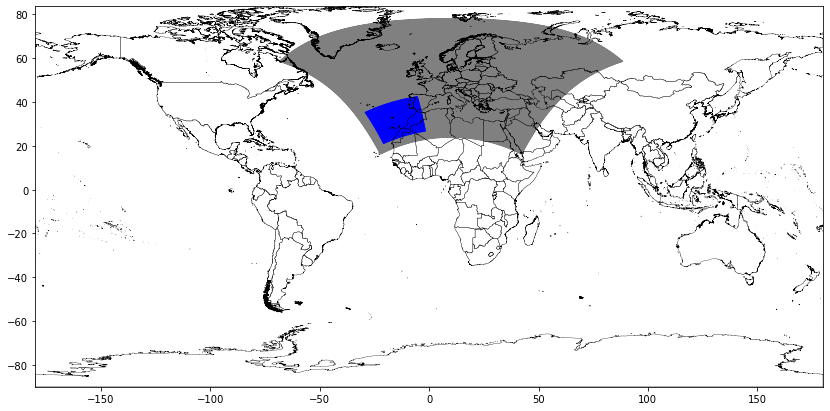

In [9]:
fig, ax = plt.subplots(1, figsize=(19, 7))
parent_nessy.shapefile.plot(ax=ax, facecolor="grey", edgecolor="grey")
nessy.shapefile.plot(ax=ax, facecolor="blue", edgecolor="blue")
countries = gpd.read_file('/gpfs/projects/bsc32/models/NES_tutorial_data/gadm_country_mask/gadm_country_ISO3166.shp')
countries.plot(ax=ax, facecolor="none", edgecolor='black', linewidth=0.3)
ax.margins(0)

## 3. Write dataset

### Write NetCDF

In [10]:
nessy.to_netcdf('rotated_nested_grid.nc', info=True)

Rank 000: Creating rotated_nested_grid.nc
Rank 000: NetCDF ready to write
Rank 000: Dimensions done


### Write shapefile

In [11]:
nessy.to_shapefile('rotated_nested_grid_shp')

/esarchive/scratch/avilanova/software/NES/nes/nc_projections/default_nes.py:3058: UserWarning: No vertical level has been specified. The first one will be selected.
  warnings.warn(msg)
/esarchive/scratch/avilanova/software/NES/nes/nc_projections/default_nes.py:3069: UserWarning: No time has been specified. The first one will be selected.
  warnings.warn(msg)
